In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
import math
warnings.filterwarnings("ignore")
%matplotlib inline


### Read all dataset

In [2]:
!unzip ./data/household_power_consumption.zip

In [3]:
file_path = "./data/household_power_consumption.txt"
all_data = pd.read_csv(file_path, delimiter=";", low_memory=False)
all_data.sample(4)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1366847,22/7/2009,22:11:00,0.962,0.216,240.570,4.000,0.000,0.000,1.0
1548069,25/11/2009,18:33:00,2.450,0.000,238.170,10.200,0.000,0.000,0.0
36316,10/1/2007,22:40:00,0.708,0.156,243.170,3.000,0.000,0.000,0.0
1616555,12/1/2010,07:59:00,1.734,0.072,241.100,7.200,0.000,0.000,18.0


### Filter data on Feb 1, 2007 and Feb 2, 2007

In [4]:
data = all_data.loc[(all_data.Date == '2/2/2007') | (all_data.Date == '1/2/2007')]
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
66636,1/2/2007,00:00:00,0.326,0.128,243.150,1.400,0.000,0.000,0.0
66637,1/2/2007,00:01:00,0.326,0.130,243.320,1.400,0.000,0.000,0.0
66638,1/2/2007,00:02:00,0.324,0.132,243.510,1.400,0.000,0.000,0.0
66639,1/2/2007,00:03:00,0.324,0.134,243.900,1.400,0.000,0.000,0.0
66640,1/2/2007,00:04:00,0.322,0.130,243.160,1.400,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...
69511,2/2/2007,23:55:00,3.696,0.226,240.900,15.200,0.000,1.000,18.0
69512,2/2/2007,23:56:00,3.698,0.226,241.020,15.200,0.000,2.000,18.0
69513,2/2/2007,23:57:00,3.684,0.224,240.480,15.200,0.000,1.000,18.0
69514,2/2/2007,23:58:00,3.658,0.220,239.610,15.200,0.000,1.000,17.0


## Preprocessing data

In [5]:
# print(f"Dataset has" , data.shape[0], "samples and ", data.shape[1], "attributes")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 66636 to 69515
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2880 non-null   object 
 1   Time                   2880 non-null   object 
 2   Global_active_power    2880 non-null   object 
 3   Global_reactive_power  2880 non-null   object 
 4   Voltage                2880 non-null   object 
 5   Global_intensity       2880 non-null   object 
 6   Sub_metering_1         2880 non-null   object 
 7   Sub_metering_2         2880 non-null   object 
 8   Sub_metering_3         2880 non-null   float64
dtypes: float64(1), object(8)
memory usage: 225.0+ KB


In [7]:
data.shape

(2880, 9)

$\rightarrow$ Dataset has 2880 samples and  9 attributes

In [8]:
data.duplicated().sum()

0

$\rightarrow$ There is no duplicated samples

In [9]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

Create a new attribute "Datetime" from "Date" and "Time", convert them to datatime64 type and drop "Date" and "Time"

In [10]:
data["Datetime"] = pd.to_datetime(data["Date"]+ " "+ data["Time"])

In [11]:
data.drop(["Date", "Time"], axis = 1, inplace=True)

Convert Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_3, Sub_metering_2 to float

In [12]:
numeric_features = list(set(data.columns) - set(["Datetime"]))
numeric_features

['Global_intensity',
 'Global_active_power',
 'Voltage',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'Global_reactive_power']

In [13]:
data[numeric_features]=data[numeric_features].apply(lambda x:pd.to_numeric(x, downcast='float', errors='ignore'))

    Check again

In [14]:
data.dtypes

Global_active_power             float32
Global_reactive_power           float32
Voltage                         float32
Global_intensity                float32
Sub_metering_1                  float32
Sub_metering_2                  float32
Sub_metering_3                  float32
Datetime                 datetime64[ns]
dtype: object

In [15]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
66636,0.326,0.128,243.149994,1.4,0.0,0.0,0.0,2007-01-02 00:00:00
66637,0.326,0.130,243.320007,1.4,0.0,0.0,0.0,2007-01-02 00:01:00
66638,0.324,0.132,243.509995,1.4,0.0,0.0,0.0,2007-01-02 00:02:00
66639,0.324,0.134,243.899994,1.4,0.0,0.0,0.0,2007-01-02 00:03:00
66640,0.322,0.130,243.160004,1.4,0.0,0.0,0.0,2007-01-02 00:04:00
...,...,...,...,...,...,...,...,...
69511,3.696,0.226,240.899994,15.2,0.0,1.0,18.0,2007-02-02 23:55:00
69512,3.698,0.226,241.020004,15.2,0.0,2.0,18.0,2007-02-02 23:56:00
69513,3.684,0.224,240.479996,15.2,0.0,1.0,18.0,2007-02-02 23:57:00
69514,3.658,0.220,239.610001,15.2,0.0,1.0,17.0,2007-02-02 23:58:00


In [16]:
def count_specical_value(Sr, key="?"):
    dict_values = Sr.value_counts()
    if key in dict_values.keys():
        return dict_values[key]
    return 0

data.agg(count_specical_value)

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

$\rightarrow$ There is no missing values in dataset

### Some properties of dataset

In [17]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,1.212672,0.100627,240.363235,5.101670,0.406250,0.257639,8.501041
std,1.051519,0.093197,2.494776,4.395392,3.654418,0.554390,8.730844
min,0.220000,0.000000,233.050003,1.000000,0.000000,0.000000,0.000000
25%,0.320000,0.000000,238.437500,1.400000,0.000000,0.000000,0.000000
50%,1.060000,0.104000,240.555000,4.600000,0.000000,0.000000,0.000000
75%,1.688500,0.144000,242.440002,7.000000,0.000000,0.000000,17.000000
max,7.482000,0.500000,246.570007,32.000000,38.000000,2.000000,19.000000


In [18]:
# data.hist(figsize=(20, 15));

In [19]:
data.Datetime = data.Datetime.map(lambda x:x.ctime())
data.set_index("Datetime", inplace=True)
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
Tue Jan 2 00:00:00 2007,0.326,0.128,243.149994,1.4,0.0,0.0,0.0
Tue Jan 2 00:01:00 2007,0.326,0.130,243.320007,1.4,0.0,0.0,0.0
Tue Jan 2 00:02:00 2007,0.324,0.132,243.509995,1.4,0.0,0.0,0.0
Tue Jan 2 00:03:00 2007,0.324,0.134,243.899994,1.4,0.0,0.0,0.0
Tue Jan 2 00:04:00 2007,0.322,0.130,243.160004,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Fri Feb 2 23:55:00 2007,3.696,0.226,240.899994,15.2,0.0,1.0,18.0
Fri Feb 2 23:56:00 2007,3.698,0.226,241.020004,15.2,0.0,2.0,18.0
Fri Feb 2 23:57:00 2007,3.684,0.224,240.479996,15.2,0.0,1.0,18.0


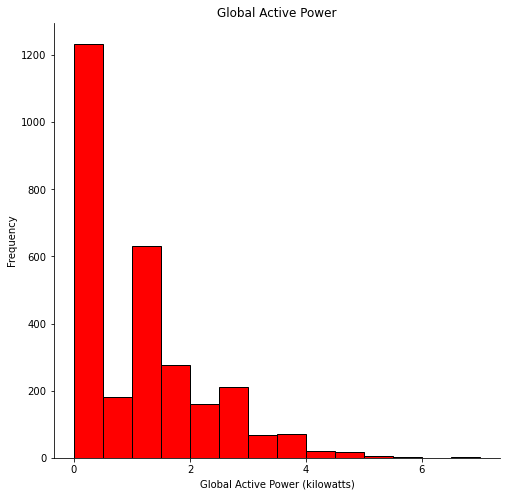

In [28]:
def plot1():
    fig, ax= plt.subplots(figsize=(8, 8))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    bins =np.arange(0, max(data["Global_active_power"]), 0.5)
    ax.hist(data["Global_active_power"], color='red', edgecolor='black', bins=bins)
    plt.xticks(list(range(0, int(max(data["Global_active_power"])), 2)))
    plt.ylabel("Frequency")
    plt.xlabel("Global Active Power (kilowatts)")
    plt.title("Global Active Power")
    fig.savefig('./images/plot1.png', bbox_inches='tight')
    plt.show()

plot1();

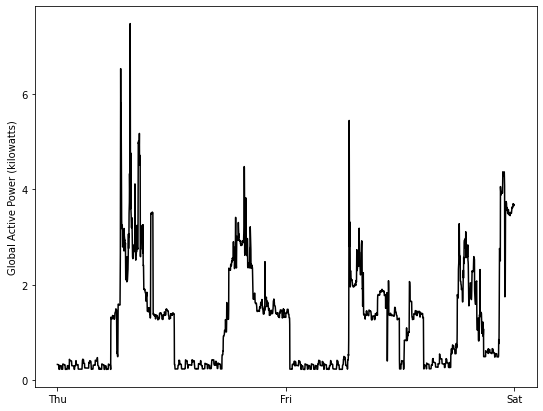

In [29]:
def plot2():
    fig, ax= plt.subplots(figsize=(9, 7))
    ax.plot(data["Global_active_power"], color='black')
    ticks = ["Thu", "Fri", "Sat"]
    yticks = list(range(0, int(max(data["Global_active_power"])), 2))    
    plt.xticks([0, data.shape[0]/2, data.shape[0]], ticks)
    plt.yticks(yticks)
    plt.ylabel("Global Active Power (kilowatts)")
    fig.savefig('./images/plot2.png', bbox_inches='tight')
    plt.show()

plot2();

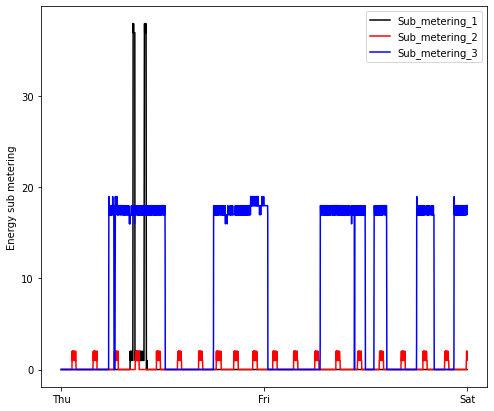

In [24]:
def plot3():
    fig, ax =plt.subplots(figsize=(8,7))
    ax.plot(data["Sub_metering_1"], color='black')
    ax.plot(data["Sub_metering_2"], color='red')
    ax.plot(data["Sub_metering_3"], color='blue')
    ax.legend(["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"])
    ticks = ["Thu", "Fri", "Sat"]
    yticks = list(range(0, int((max(data["Sub_metering_1"]) )), 10))
    plt.yticks(yticks)
    plt.xticks([0, data.shape[0]/2, data.shape[0]], ticks)
    plt.ylabel("Energy sub metering")
    fig.savefig('./images/plot3.png', bbox_inches='tight')
    plt.show()
    
plot3()

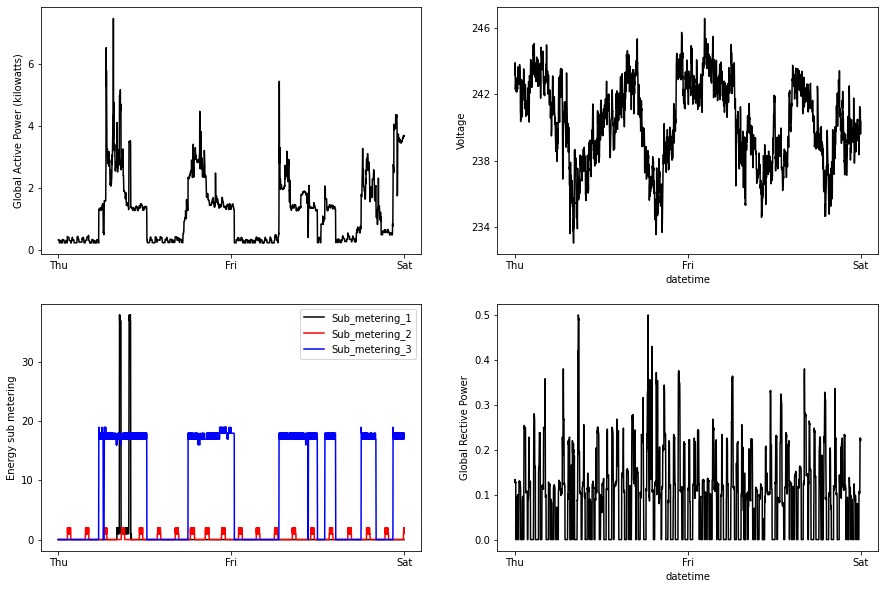

In [30]:
def plot4():
    fig = plt.figure(figsize=(15,10))

    ax1 = fig.add_subplot(221)
    ax1.plot(data["Global_active_power"], color='black')
    ticks = ["Thu", "Fri", "Sat"]
    plt.xticks([0, data.shape[0]/2, data.shape[0]], ticks)
    plt.yticks(list(range(0, int(max(data["Global_active_power"])), 2)))
    plt.ylabel("Global Active Power")

    ax2=fig.add_subplot(222)
    ax2.plot(data["Voltage"], color='black')
    yticks=list(range(int(data["Voltage"].min()+1), int(data["Voltage"].max()+1), 4))
    ticks = ["Thu", "Fri", "Sat"]
    plt.xticks([0, data.shape[0]/2, data.shape[0]], ticks)
    plt.yticks(yticks)
    plt.xlabel("datetime")
    plt.ylabel("Voltage")

    ax3=fig.add_subplot(223)
    ax3.plot(data["Sub_metering_1"], color='black')
    ax3.plot(data["Sub_metering_2"], color='red')
    ax3.plot(data["Sub_metering_3"], color='blue')
    ax3.legend(["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"])
    yticks = list(range(0, int((max(data["Sub_metering_1"]) )), 10))
    ticks = ["Thu", "Fri", "Sat"]
    plt.yticks(yticks)
    plt.xticks([0, data.shape[0]/2, data.shape[0]], ticks)
    plt.ylabel("Energy sub metering")

    ax4=fig.add_subplot(224)
    ax4.plot(data["Global_reactive_power"], color='black')
    ticks = ["Thu", "Fri", "Sat"]
    plt.xticks([0, data.shape[0]/2, data.shape[0]], ticks)
    plt.ylabel("Global Rective Power")
    plt.xlabel("datetime")
    fig.savefig('./images/plot4.png', bbox_inches='tight')
    fig.show();
    
plot4()